In [1]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
import seaborn as sns # improves plot aesthetics
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [6]:
path_mapsummary = 'summary_61.txt'
path_length = 'length_61'
count = 61
count_ = 36  # 9sample:34  61 sample:36

# 1. mapping ratio plot

In [7]:
col_names = ['Sample','Raw_reads','Clean_reads','Clean_reads_ratio','rRNA','rRNA_ratio','Kept_reads','hg38','hg38_ratio',
               'miRNA_pre','miRNA_pre_ratio','piRNA','piRNA_ratio','Y_RNA','Y_RNA_ratio',
                'snRNA','snRNA_ratio','srpRNA','srpRNA_ratio','tRNA','tRNA_ratio',
                'other_lncRNA','other_lncRNA_ratio','mRNA','mRNA_ratio']
table = pd.read_table(path_mapsummary,delimiter="\t",names = col_names,index_col=0,skiprows=[0])

In [8]:
Raw_reads = np.array(table.iloc[:,0])
Clean_reads = np.array([np.array(table['Clean_reads_ratio'].str.split(' ')[i])[0] for i in range(count)])
Clean_reads_ratio = np.array([np.array(table['Clean_reads_ratio'].str.split(' '))[i][1][1:-1] for i in range(count)])
Kept_reads = np.array(table.iloc[:,3]) 
rRNA = np.array(table.iloc[:,4]) 
rRNA_ratio = np.array(table.iloc[:,5]) 
hg38 = np.array(table.iloc[:,6]) 
hg38_ratio = np.array(table.iloc[:,7]) 
miRNA_pre = np.array(table.iloc[:,8]) 
miRNA_pre_ratio = np.array(table.iloc[:,9]) 
piRNA = np.array(table.iloc[:,10]) 
piRNA_ratio = np.array(table.iloc[:,11]) 
Y_RNA = np.array(table.iloc[:,12]) 
Y_RNA_ratio = np.array(table.iloc[:,13]) 
snRNA = np.array(table.iloc[:,14]) 
snRNA_ratio = np.array(table.iloc[:,15]) 
srpRNA = np.array(table.iloc[:,16]) 
srpRNA_ratio = np.array(table.iloc[:,17]) 
tRNA = np.array(table.iloc[:,18]) 
tRNA_ratio = np.array(table.iloc[:,19]) 
other_lncRNA = np.array(table.iloc[:,20]) 
other_lncRNA_ratio = np.array(table.iloc[:,21]) 
mRNA = np.array(table.iloc[:,22]) 
mRNA_ratio = np.array(table.iloc[:,23])

In [9]:
newarray = np.concatenate((Raw_reads,pd.Series(Clean_reads),pd.Series(Clean_reads_ratio),rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,
            miRNA_pre,miRNA_pre_ratio,piRNA,piRNA_ratio,Y_RNA,Y_RNA_ratio,
                snRNA,snRNA_ratio,srpRNA,srpRNA_ratio,tRNA,tRNA_ratio,
                other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio),axis=0).reshape(-1,count).T
newtable = pd.DataFrame(newarray)
newtable.columns = col_names[1:]
newtable

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,snRNA,snRNA_ratio,srpRNA,srpRNA_ratio,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio
0,66448520,59634503,89.7%,2993743,5.02%,56640760,48736526,81.73%,28617222,47.99%,...,69142,0.12%,16023,0.03%,74897,0.13%,5109788,8.57%,455088,0.76%
1,19811909,18471503,93.2%,351173,1.90%,18120330,13702414,74.18%,7679708,41.58%,...,67671,0.37%,13628,0.07%,25160,0.14%,1014445,5.49%,75886,0.41%
2,58813414,52631685,89.5%,2552199,4.85%,50079486,42018095,79.83%,20545637,39.04%,...,73615,0.14%,16960,0.03%,65232,0.12%,4375977,8.31%,389364,0.74%
3,70911180,66016169,93.1%,1076671,1.63%,64939498,53921958,81.68%,39575057,59.95%,...,40361,0.06%,15454,0.02%,94992,0.14%,2223669,3.37%,109932,0.17%
4,34239617,28912005,84.4%,30094,0.10%,28881911,25344538,87.66%,15782566,54.59%,...,255477,0.88%,9020,0.03%,30145,0.10%,1012429,3.50%,66675,0.23%
5,73816382,69809796,94.6%,1325129,1.90%,68484667,61296659,87.81%,31936140,45.75%,...,46949,0.07%,34072,0.05%,94461,0.14%,4126074,5.91%,227141,0.33%
6,38216683,35305831,92.4%,705045,2.00%,34600786,23601095,66.85%,7812707,22.13%,...,14942,0.04%,10380,0.03%,53060,0.15%,1609439,4.56%,73782,0.21%
7,41141554,39581010,96.2%,558271,1.41%,39022739,35836284,90.54%,18195534,45.97%,...,44794,0.11%,9341,0.02%,35523,0.09%,1598628,4.04%,59125,0.15%
8,65460372,54146301,82.7%,2132108,3.94%,52014193,41518030,76.68%,19690176,36.36%,...,62345,0.12%,15424,0.03%,82156,0.15%,4165640,7.69%,274309,0.51%
9,47707556,44585561,93.5%,3181954,7.14%,41403607,37855489,84.91%,13672772,30.67%,...,77109,0.17%,14468,0.03%,98218,0.22%,6731014,15.10%,523954,1.18%


Kept_reads :all 
other genomic region: hg38 - else  ratio:(hg38 - else)/Kept_reads
non human region: Kept_reads - hg38  ratio:(Kept_reads - hg38)/Kept_reads

In [10]:
newtable['other_genomic_region'] = newtable['hg38'] - (newtable['miRNA_pre'] +newtable['piRNA'] +
                 newtable['Y_RNA'] +newtable['snRNA']+newtable['srpRNA']+
                    newtable['tRNA']+newtable['other_lncRNA']+newtable['mRNA'])
newtable['non_human'] = newtable['Kept_reads'] - newtable['hg38']
newtable['other_genomic_region_ratio'] = newtable['other_genomic_region']/newtable['Kept_reads']
newtable['non_human_ratio'] = newtable['non_human']/newtable['Kept_reads']


In [11]:
def p2f(x):
    return float(x.strip('%'))/100
indexper = np.concatenate((np.array([2,4]),np.arange(7,25,2)))
newarray_per = np.array(newtable).copy()
for i in indexper:
    for j in range(count):
        newarray_per[j,i] = p2f(newarray[j,i])
newarray_per = newarray_per.astype('float')

In [137]:
average = np.average(newarray_per,axis=0)
average

array([5.09940060e+07, 4.51796240e+07, 8.90196721e-01, 1.19220857e+06,
       2.60065574e-02, 4.39874154e+07, 3.77075649e+07, 8.28260656e-01,
       1.78526121e+07, 3.85990164e-01, 8.85232131e+05, 1.94163934e-02,
       1.49870234e+07, 3.34611475e-01, 4.43406721e+04, 1.04098361e-03,
       1.48302131e+04, 3.45901639e-04, 5.77215410e+04, 1.28360656e-03,
       2.47326980e+06, 5.42803279e-02, 1.95844459e+05, 4.30163934e-03,
       1.19669057e+06, 6.27985049e+06, 2.78682435e-02, 1.49415201e-01])

In [132]:
newtable.head()

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio,other_genomic_region,non_human,other_genomic_region_ratio,non_human_ratio
0,66448520,59634503,89.7%,2993743,5.02%,56640760,48736526,81.73%,28617222,47.99%,...,74897,0.13%,5109788,8.57%,455088,0.76%,2319057,7904234,0.0409433,0.13955
1,19811909,18471503,93.2%,351173,1.90%,18120330,13702414,74.18%,7679708,41.58%,...,25160,0.14%,1014445,5.49%,75886,0.41%,1064507,4417916,0.0587466,0.24381
2,58813414,52631685,89.5%,2552199,4.85%,50079486,42018095,79.83%,20545637,39.04%,...,65232,0.12%,4375977,8.31%,389364,0.74%,1915280,8061391,0.0382448,0.160972
3,70911180,66016169,93.1%,1076671,1.63%,64939498,53921958,81.68%,39575057,59.95%,...,94992,0.14%,2223669,3.37%,109932,0.17%,1543657,11017540,0.0237707,0.169659
4,34239617,28912005,84.4%,30094,0.10%,28881911,25344538,87.66%,15782566,54.59%,...,30145,0.10%,1012429,3.50%,66675,0.23%,728187,3537373,0.0252126,0.122477


In [133]:
print avedf.shape
print newtable.shape

(1, 28)
(61, 28)


In [134]:
indper = [2,4,7,9,11,13,15,17,19,21,23,26,27]
indint = np.setdiff1d(range(28),indper)
len(indper)+indint.shape[0]

28

In [138]:
average[indint] = average[indint].astype('int')
strper =  ['{:.4f}%'.format(average[indper][i]*100) for i in range(13)] 
average = average.astype('str')
average[indper] = strper

In [139]:
average

array(['50994006.0', '45179623.0', '89.0197%', '1192208.0', '2.6007%',
       '43987415.0', '37707564.0', '82.8261%', '17852612.0', '38.5990%',
       '885232.0', '1.9416%', '14987023.0', '33.4611%', '44340.0',
       '0.1041%', '14830.0', '0.0346%', '57721.0', '0.1284%', '2473269.0',
       '5.4280%', '195844.0', '0.4302%', '1196690.0', '6279850.0',
       '2.7868%', '14.9415%'], dtype='|S32')

In [140]:
avedf = pd.DataFrame(average.reshape(1,-1),columns=newtable.columns,index=['average'])
newtable.append(avedf).tail()

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio,other_genomic_region,non_human,other_genomic_region_ratio,non_human_ratio
57,43540748,42250222,97.0%,551496,1.31%,41698726,39689074,93.94%,13461120,31.86%,...,46437,0.11%,1055084,2.50%,74136,0.18%,511210,2009652,0.0122596,0.0481946
58,58454997,56697786,97.0%,450622,0.79%,56247164,52611803,92.79%,18078981,31.89%,...,52063,0.09%,1054627,1.86%,77130,0.14%,585025,3635361,0.010401,0.0646319
59,52098453,50236958,96.4%,945916,1.88%,49291042,47218553,93.99%,17689202,35.21%,...,63434,0.13%,1234238,2.46%,90150,0.18%,644391,2072489,0.0130732,0.042046
60,67754658,62006641,91.5%,2049356,3.31%,59957285,48445433,78.13%,36345866,58.62%,...,79290,0.13%,1817340,2.93%,117829,0.19%,1360802,11511852,0.0226962,0.192001
average,50994006.0,45179623.0,89.0197%,1192208.0,2.6007%,43987415.0,37707564.0,82.8261%,17852612.0,38.5990%,...,57721.0,0.1284%,2473269.0,5.4280%,195844.0,0.4302%,1196690.0,6279850.0,2.7868%,14.9415%


In [141]:
newtable.append(avedf).to_csv('61sample.csv')

In [16]:
rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'snRNA','srpRNA','tRNA',
            'lncRNA','mRNA','other_genomic_region','non_human',
            ]
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.) 
colours = tableau20[:10]

In [17]:
rnaindex= [9,11,13,15,17,19,21,23,26,27]

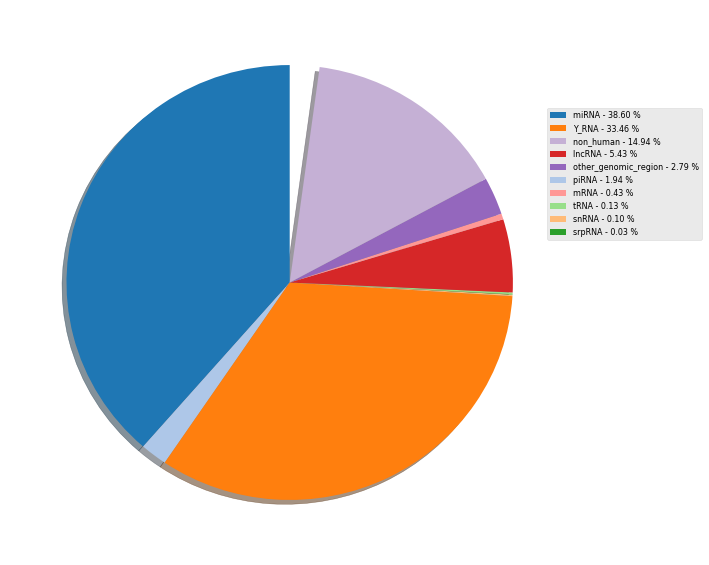

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = rnanames
y = average[rnaindex]
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

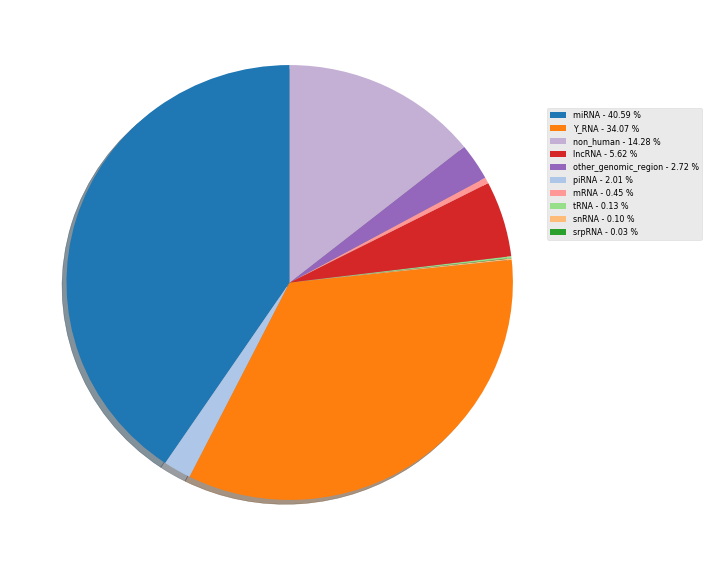

In [19]:
import matplotlib.pyplot as plt
import numpy as np
rnaindex_ = [8,10,12,14,16,18,20,22,24,25]
x = rnanames
y = average[rnaindex_]/average[5]
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

In [20]:
randnarr = np.random.uniform(-18,18,count).reshape(-1,1)
for i in range(9):
    randnarr = np.concatenate((randnarr,np.random.uniform(-18,18,count).reshape(-1,1)),axis=1)

In [21]:
#ratiodata:
ratiodata = [newarray_per[i,rnaindex_]/newarray_per[i,5] for i in range(count)]
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
dataarr =ratiodata
colave =  average[rnaindex]
sizes = np.repeat(16,10) +np.ceil((colave/np.average(colave) *2))
transformed = scalar.fit_transform(dataarr)
#dattest = pd.DataFrame(transformed)
angle = np.repeat(np.arange(0,360,36),count).reshape(10,-1).T +randnarr
#sizes = np.ceil((colave/np.average(colave) *10))
data_r = np.multiply(transformed,np.repeat(10,count*10).reshape(count,-1))
data_theta = np.multiply(transformed,np.repeat(36,count*10).reshape(count,-1))+angle
concatdata = pd.concat((pd.DataFrame(data_r,columns=['trial_'+str(i+1)+'_r' for i in range(10)]),
          pd.DataFrame(data_theta,columns=['trial_'+str(i+1)+'_theta' for i in range(10)])),axis=1)
concatdata.head()

,trial_1_r,trial_2_r,trial_3_r,trial_4_r,trial_5_r,trial_6_r,trial_7_r,trial_8_r,trial_9_r,trial_10_r,trial_1_theta,trial_2_theta,trial_3_theta,trial_4_theta,trial_5_theta,trial_6_theta,trial_7_theta,trial_8_theta,trial_9_theta,trial_10_theta
0,6.776136,3.544847,2.795129,1.234185,1.001844,3.731992,5.107468,3.221269,3.787908,1.433268,42.039489,62.492925,64.952855,107.259972,165.531965,182.049579,252.231141,261.034410,305.323423,322.228365
1,5.640248,0.392667,2.990391,4.124168,3.958631,4.005446,2.792933,1.473378,5.857666,2.813342,13.365138,28.994221,86.571800,119.652242,164.172132,189.930978,242.635875,243.939191,304.276216,332.536162
2,5.451127,3.102585,4.119818,1.520734,1.353319,3.650397,4.915887,3.103258,3.474195,1.716824,14.341634,46.957998,91.673126,116.990783,154.744127,206.653072,242.533701,249.774721,295.413473,326.518719
3,8.229393,0.687259,2.172753,0.545330,0.718811,4.312377,1.322833,0.339671,1.791479,1.831808,24.724342,25.163819,82.930520,92.420620,142.041898,205.513715,212.387633,244.454135,300.652189,332.612370
4,7.351041,0.000000,3.849997,10.000000,1.187231,2.580883,1.377733,0.619434,1.959106,1.207272,38.501341,52.894772,76.676059,159.474201,139.616006,204.685153,221.243726,263.533138,290.755333,311.774483


In [22]:
[[ratiodata[i][j] for i in range(count)] for j in range(9)]
#第一种RNA的九个样本的比例

[[0.5052407841985171,
  0.42381722628671775,
  0.4102605406133761,
  0.6094142735750745,
  0.5464515834842092,
  0.46632540390391325,
  0.22579565100052928,
  0.46628028852613346,
  0.3785539073921612,
  0.3302314216246908,
  0.31868003897154595,
  0.3087249264662233,
  0.22696209570022843,
  0.2331793227570751,
  0.1851955548947121,
  0.33210755135594044,
  0.5144845338741884,
  0.2798163937032023,
  0.441054899699392,
  0.7363362338860021,
  0.01950873572896122,
  0.3537398968713043,
  0.42841047129070314,
  0.3801069273468767,
  0.4813488693095257,
  0.3420079920596695,
  0.25611753273087773,
  0.4841087734044309,
  0.5002178443762582,
  0.46392903150472553,
  0.3158107915630985,
  0.2604260378298419,
  0.4433344015805019,
  0.5656006464277187,
  0.324237383675608,
  0.5977810768594998,
  0.36255969648896513,
  0.49496616766874446,
  0.4413877295340549,
  0.46638291875713683,
  0.32387444542132804,
  0.44541220008126753,
  0.3695464109014786,
  0.29048000157767206,
  0.3399525570248

In [23]:
text_per = [['{:.3f}%'.format(ratiodata[i][j]*100) for i in range(count)] for j in range(10)]

In [24]:
len(text_per)

10

In [25]:
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
data1 = [go.Scatterpolar(
      r = concatdata['trial_'+str(i+1)+'_r'],
      theta = concatdata['trial_'+str(i+1)+'_theta'],
      mode = "markers",
      name = rnanames[i],
      text = text_per[i],
      marker = dict(
        color = ['rgb(230,171,2)' ,"rgb(102,166,30)","rgb(231,41,138)" ,"rgb(117,112,179)"  ,"rgb(217,95,2)"
 ,"rgb(27,158,119)" ,"rgb(61,74,192)","rgb(47,192,66)","rgb(182,192,47)","rgb(187,47,192)"][i],
        size = sizes[i],
        line = dict(
          color = "white"
        ),
        opacity = 0.7
      ),
      cliponaxis = False
    ) for i in range(10)]
#data
layout = go.Layout(
    title = "RNA",
    font = dict(
      size = 15
    ),
    showlegend = False,
    polar = dict(
      bgcolor = "rgb(223, 223, 223)",
      angularaxis = dict(
        tickwidth = 2,
        linewidth = 3,
        layer = "below traces"
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        tickwidth = 2,
        gridcolor = "white",
        gridwidth = 2
      )
    ),
    paper_bgcolor = "rgb(223, 223, 223)"
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, validate = False)

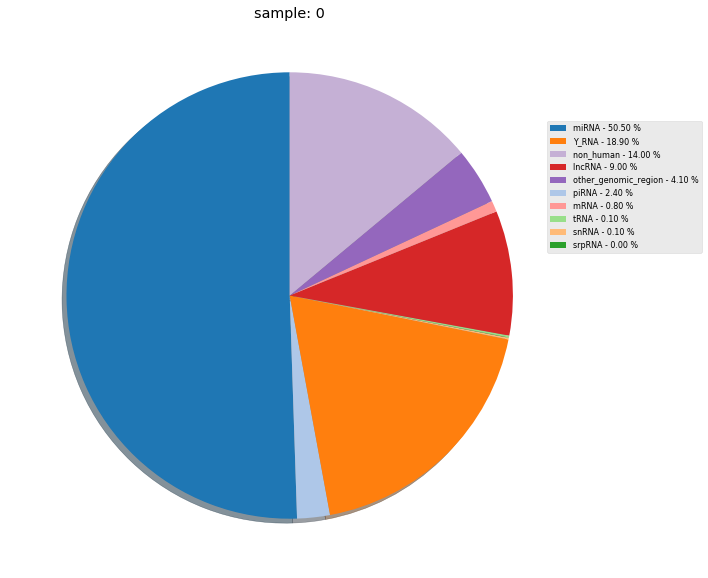

In [26]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

colors = tableau20[:10]
explode = (0,0,0,0,0,0,0.0, 0.0, 0.0, 0.0)
#rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'other_genome','NonHuman','snRNA','srpRNA','tRNA','lncRNA','mRNA']


fig, ax = plt.subplots(figsize=(10,10))

def update(num):
    ax.clear()
    ax.axis('equal')
    x = rnanames
    y = ratiodata[num]
    z = np.array([float('{:.3f}'.format(y[i])) for i in range(y.shape[0])])*100
    patches, texts = ax.pie(y,  colors=colours, 
                        shadow=True, startangle=90)
    ax.set_title('sample: '+str(num))
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

ani = FuncAnimation(fig, update, frames=range(count), interval=500,repeat=True)
ani

In [27]:
percentagedf = pd.DataFrame([[ratiodata[i][j] for i in range(count)] for j in range(10)]).T
percentagedf.columns = rnanames

In [28]:
percentagedf.head()

,miRNA,piRNA,Y_RNA,snRNA,srpRNA,tRNA,lncRNA,mRNA,other_genomic_region,non_human
0,0.505241,0.023729,0.189463,0.001221,0.000283,0.001322,0.090214,0.008035,0.040943,0.139550
1,0.423817,0.006098,0.201482,0.003735,0.000752,0.001388,0.055984,0.004188,0.058747,0.243810
2,0.410261,0.021255,0.271001,0.001470,0.000339,0.001303,0.087381,0.007775,0.038245,0.160972
3,0.609414,0.007746,0.151154,0.000622,0.000238,0.001463,0.034242,0.001693,0.023771,0.169659
4,0.546452,0.003902,0.254393,0.008846,0.000312,0.001044,0.035054,0.002309,0.025213,0.122477


In [29]:
my_pal = {}
for i in range(10):
    my_pal[rnanames[i]] = tableau20[i]

[Text(0,0,'0.0%'),
 Text(0,0,'10.0%'),
 Text(0,0,'20.0%'),
 Text(0,0,'30.0%'),
 Text(0,0,'40.0%'),
 Text(0,0,'50.0%'),
 Text(0,0,'60.0%'),
 Text(0,0,'70.0%'),
 Text(0,0,'80.0%'),
 Text(0,0,'90.0%')]

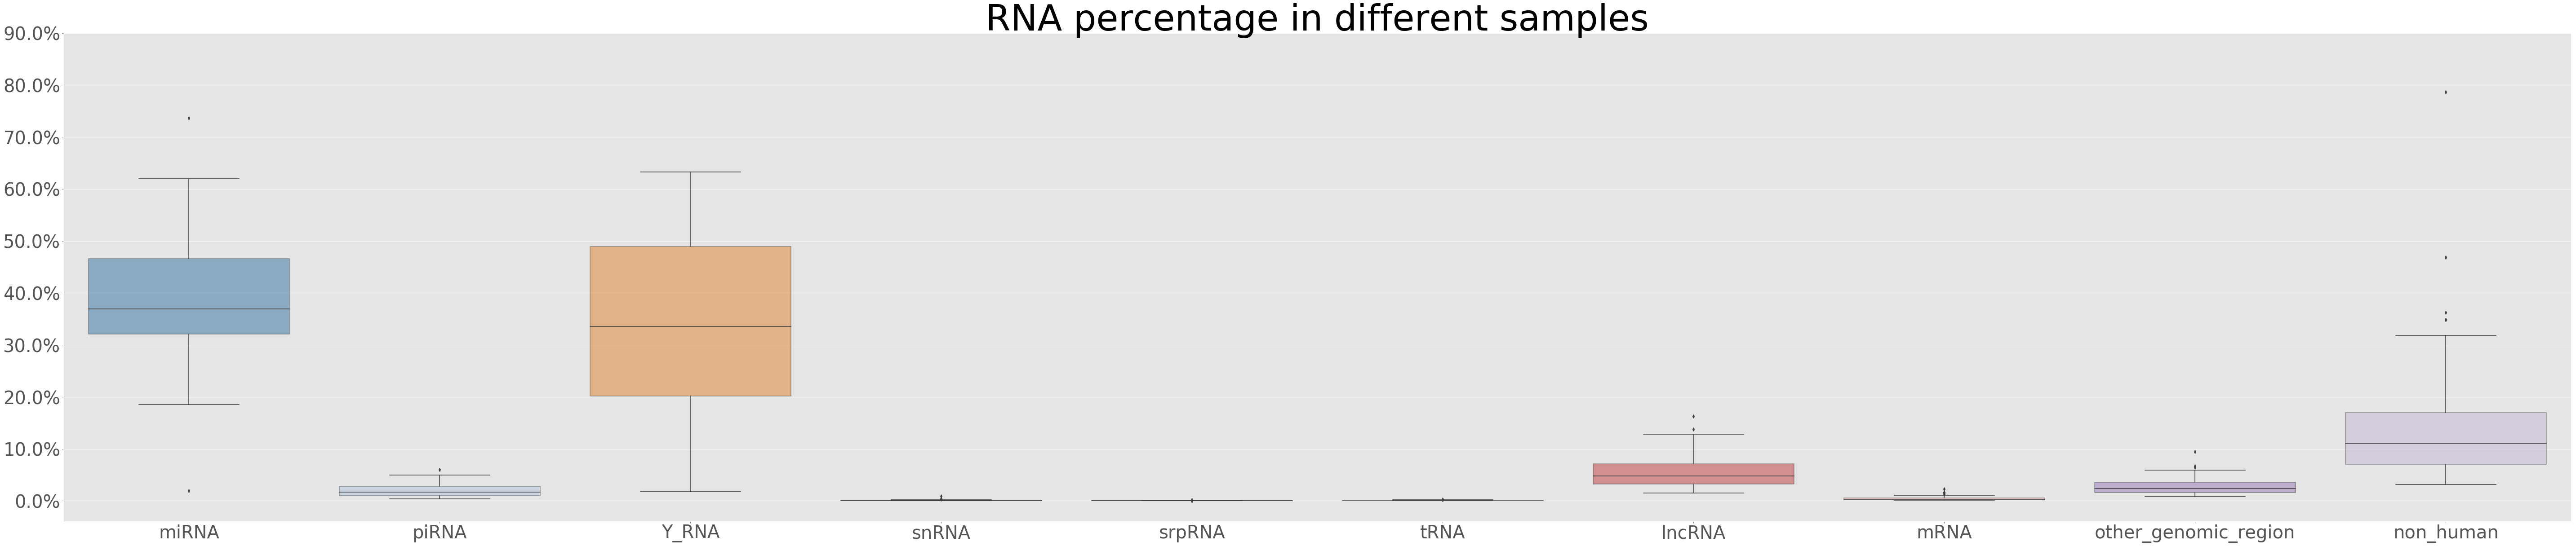

In [30]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =percentagedf,ax=ax,boxprops=dict(alpha=.5),palette=my_pal)
ax.set_title(u'RNA percentage in different samples',fontsize=80)
ax.set_xticks(range(10))
ax.set_xticklabels(rnanames,fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)

# 2. read length distribution

In [53]:
lengthname = np.loadtxt(path_length,dtype='str')[0,1:]
# ['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'srpRNA', 'lncRNA','tRNA', 'mRNA']
lengthdat = np.loadtxt(path_length,dtype='str')[1:,1:].astype('float')

In [54]:
lengthname

array(['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'srpRNA', 'tRNA',
       'other_lncRNA', 'mRNA'], dtype='|S19')

(array([299.,  11.,   4.,   2.,   3.,   0.,   4.,   0.,   0.,   1.]),
 array([2.28941947e-03, 6.88349373e+00, 1.37646980e+01, 2.06459024e+01,
        2.75271067e+01, 3.44083110e+01, 4.12895153e+01, 4.81707196e+01,
        5.50519239e+01, 6.19331282e+01, 6.88143325e+01]),
 <a list of 10 Patch objects>)

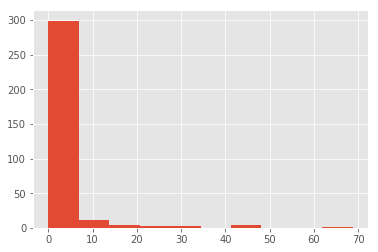

In [55]:
hist(lengthdat.ravel())

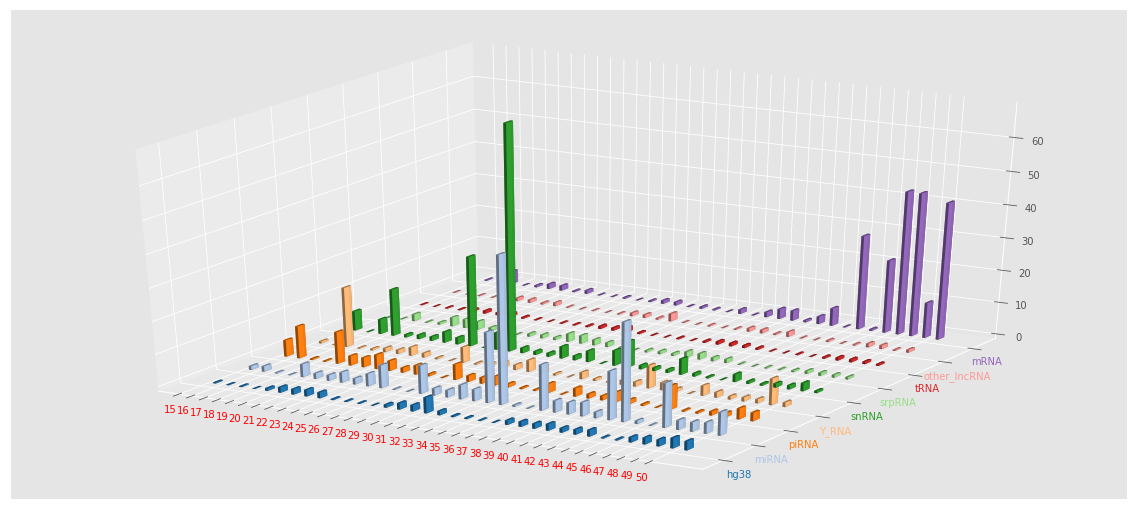

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#count_ = 34
fig = plt.figure(figsize=(20,9))
ax1 = fig.add_subplot(111, projection='3d')

xpos = np.repeat(np.arange(1,count_+1),9).reshape(count_,-1).T.ravel()
ypos = np.repeat(range(9),count_).ravel()
num_elements = len(xpos)
zpos = np.zeros(count_*9)
dx = np.ones(count_*9)/5
dy = np.ones(count_*9)/5
dz = lengthdat.ravel()

for i in range(9):
    ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
              dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=tableau20[i],alpha=0.9)
plt.xticks(range(count_), [str(i+15) for i in range(count_)], color='red')
#for i in range(9):
ax1.set_yticks(range(9))
ax1.set_yticklabels(lengthname, color='blue')
for color,tick in zip(tableau20[:9],ax1.yaxis.get_major_ticks()):
    tick.label1.set_color(color)

#ax1.bar3d(xpos[3:], ypos[3:], zpos[3:], dx[3:], dy[3:], dz[3:], color='b')
plt.show()

In [58]:
dfnew = pd.DataFrame(np.concatenate((xpos.reshape(-1,1),ypos.reshape(-1,1),dz.reshape(-1,1),dz.reshape(-1,1)*100),axis=1))
dfnew.columns = ['x','y','percentage','size']
dfnew['rnaname'] = np.repeat(np.array(lengthname),count_)
hover_text = []
for index, row in dfnew.iterrows():
    hover_text.append(('RNA: {country}<br>'+
                      'Reads Length: {lifeExp}<br>'+
                      'Reads percentage: {gdp}<br>'
                      ).format(country=row['rnaname'],
                                            lifeExp=row['x'],
                                            gdp=row['percentage']
                                           ))
sizeref = 2.*max(dfnew['size'])/(100**2)
dfnew['text'] = hover_text

In [60]:
data = [go.Scatter(
    y=dfnew['y'][dfnew['rnaname'] ==lengthname[i]],
    x=dfnew['x'][dfnew['rnaname'] == lengthname[i]]+15,
    mode='markers',
    name=lengthname[i],
    text=dfnew['text'][dfnew['rnaname'] == lengthname[i]],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=dfnew['size'][dfnew['rnaname'] == lengthname[i]],
        line=dict(
            width=2
        ),
    )
) for i in range(9)]


layout = go.Layout(
    title='Reads Length Distribution',
    xaxis=dict(
        title='Length',
        gridcolor='rgb(255, 255, 255)',
        range=[10,60],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='RNA',
        gridcolor='rgb(255, 255, 255)',
        range=[-1,10],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='life-expectancy-per-GDP-2007')

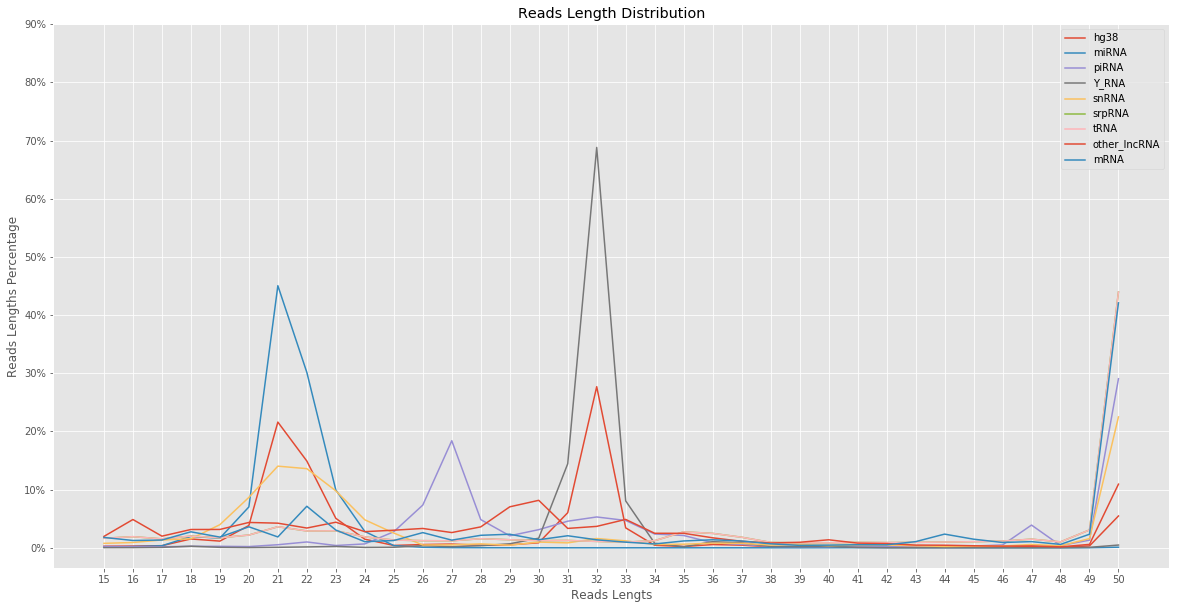

In [61]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = lengthname
for y_arr, label in zip(lengthdat.T, labels):
    plt.plot(y_arr, label=label)
ax.set_title('Reads Length Distribution')
ax.set_xlabel('Reads Lengts')
ax.set_ylabel('Reads Lengths Percentage')
ax.set_xticks(range(count_))
ax.set_yticks(np.arange(0,100,10))
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(count_):
    labels[i] = str(i+15)
labels_y = [item.get_text() for item in ax.get_yticklabels()]
for i in range(10):
    labels_y[i] = str(i*10)+'%'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels_y)
plt.legend()
plt.show()